
In this notebook, we will build and train convolutional neural networks (CNN) on a subset of [Kaggle "cats vs. dog"](https://www.kaggle.com/c/dogs-vs-cats) classification data. The goal of the notebook are four folds:


1.   Train a small CNN from scratch as a baseline
2.   Improve the baseline model. You can find some hints in the last section.
3.   Implement transfer learning: fine-tune top layers of a pre-trained network
4.   Experiment and develop a better model (i.e., better accuracy). You can find some hints in the last section.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/MyDrive/')
os.listdir()

['Nina_thesis_methods.docx',
 'From.docx',
 'Colab Notebooks',
 'matlab_script',
 'Rscript',
 'dogs-vs-cats-small.zip',
 'MSBC5190_S24_Homework_1_new.ipynb',
 'dogs-vs-cats-small',
 'des',
 'Nina_SQL']

First, import the packages or modules required for this homework.

In [ ]:


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

## Obtain and Organize the Data Sets

The competition data is divided into training set (25,000 images) and testing set (10,000 images). For this homework, we are going to use 4,000 images (2,000 cat images and 2,000 dog images) from the original training data for training, 1,000 images for validation, and 1,000 images for testing.


### Download the Data Set###
The small data set `dogs-vs-cats-small.zip` can be downloaded through Canvas. After downloading the data, upload it to Google Colab. The easiest way to do it is to use the upload option at the top of the file-explorer pane. Note that files uploaded in this way are uploaded to the running instance and will be deleted when the session is disconnected. Alternatively, you can also upload the data set to your Google Drive and mount your Google Drive to Colab. (More info: https://colab.research.google.com/notebooks/io.ipynb)


### Unzip the Data Set###


In [ ]:
!unzip ./dogs-vs-cats-small.zip

Here, I assume that you upload `dogs-vs-cats-small.zip` to the running instance of Google Colab. I have already organized the data to training, validation, and testing dataset. Under each of the data directories, each subdirectory represent a class and contains images from that class. After unzipping, you will find the training, validation, and testing data set in the following paths:

* dogs-vs-cats-small/
  * train/
    * cat/
    * dog/
  * validation/
    * cat/
    * dog/
  *test/
    * cat/
    * dog/


### Read and Preprocess the Data

We use [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) to load images on the fly from disk. You can use and modify it later to perform random data augmentations to improve model performance. Here, we rescale the data to between 0 and 1 (by multiplying by 1/255)

Note: Here we are following our textbook and use ImageDataGenerator to load images and perform data augmentation. Alternatively, you can also use tf.keras.utils.image_dataset_from_directory.

*   https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
*   https://www.tensorflow.org/tutorials/load_data/images




In [ ]:
data_dir = './dogs-vs-cats-small/'

In [ ]:
type(data_dir)

str

In [ ]:
def plot_learning_curve(history):

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(alpha=0.5)

  # Plotting accuracy curves
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(alpha=0.5)

  plt.tight_layout()
  plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#rescaling ensures that pixel values are within a normalized range,
#and the data format is specified to match the channel order commonly used in deep learning models.
# Instantiate three image generator classes:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

valid_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last'
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Fill in your code
# Import relevant packages
# https://keras.io/guides/sequential_model/
# https://keras.io/api/layers/
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
#flow_from_directory: This method is commonly used when your data is organized in a directory structure where each subdirectory corresponds to a class,
#and images for each class are stored in their respective subdirectories.
#flow is more general

batch_size=32
train_generator = train_datagen.flow_from_directory(
    directory=data_dir + 'train',
    target_size=(224, 224),
    classes=['cat','dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory=data_dir + 'validation',
    target_size=(224, 224),
    classes=['cat','dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

test_generator = test_datagen.flow_from_directory(
    directory=data_dir + 'test',
    target_size=(224, 224),
    classes=['cat','dog'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 1. Build and Train a Baseline Model (40%)

We will start with building a simple convolutional neural network.

### Define the model

Please define a model with the following layers and hyperparameters.
* Input image: 224 (height) x 224 (width) x 3 (channels)
* Convolution: 16 kernels (size = 3 x 3), stride = 1, padding = 1
* MaxPool: kernel size = 2 x 2, stride = 2, padding = 0
* Convolution: 32 kernels (size = 3 x 3), stride = 1, padding = 1
* MaxPool: kernel size = 2 x 2, stride = 2, padding = 0
* Convolution: 64 kernels (size = 3 x 3), stride = 1, padding = 1
* MaxPool: kernel size = 2 x 2, stride = 2, padding = 0
* Dense: 128 fully connected neurons
* Output: 2 classes


In [ ]:
################################################################################
# TODO: Fill in your codes                                                     #
# Define the model                                                             #
################################################################################


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))

# Flatten layer to transition from convolutional layers to fully connected layer
model.add(Flatten())

# Dense (fully connected) layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 64)       

**Inline Question #1:** Notice the output shape and # of param of each layer

- What is the output shape of the first convolutional layer and how to calculate it?
- What is the # of params of the first convolutional layer and how to calculate it?


**Your Answer:** *fill this in*


1.   (224,224,16)
  * (224-3+2*1)+1/1 = 224
  * 16 is number of kernels with specified
    
    ((Input Shape-Kernel Size+2 * Padding)/Stride) + 1
2.   (3 * 3 * 3+1) * 16 = 448  
    Number of Parameters =(Filter Size* Number of Input Channels+1)* Number of Filters



### Configure and Train the Baseline Model

Please use Adam as the optimizer and keep track of accuracy metric.

**Inline Question #2:** What loss function will you choose for this classfication problem?

**Your Answer:** *categorical_crossentropy*

In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Inline Question #3:** Please draw loss and accuracy learning curves on the training and validation set.
- Please explain your observation of the learning curves.

**Your Answer:** *There is a divergence in training and validation trajectories over epochs. Training metrics keep improving while validation plateaus and degrades. The expanding gap points to overfitting emerging, especially after epoch 6.*

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=valid_generator)

Epoch 1/10
125/125 [==============================] - 28s 210ms/step - loss: 0.7297 - accuracy: 0.5415 - val_loss: 0.6805 - val_accuracy: 0.6360
Epoch 2/10
125/125 [==============================] - 26s 205ms/step - loss: 0.6521 - accuracy: 0.6210 - val_loss: 0.5999 - val_accuracy: 0.6910
Epoch 3/10
125/125 [==============================] - 26s 204ms/step - loss: 0.5923 - accuracy: 0.6935 - val_loss: 0.5575 - val_accuracy: 0.7170
Epoch 4/10
125/125 [==============================] - 25s 204ms/step - loss: 0.5104 - accuracy: 0.7485 - val_loss: 0.5219 - val_accuracy: 0.7320
Epoch 5/10
125/125 [==============================] - 26s 205ms/step - loss: 0.4289 - accuracy: 0.7970 - val_loss: 0.5037 - val_accuracy: 0.7520
Epoch 6/10
125/125 [==============================] - 25s 203ms/step - loss: 0.3495 - accuracy: 0.8425 - val_loss: 0.4925 - val_accuracy: 0.7730
Epoch 7/10
125/125 [==============================] - 25s 204ms/step - loss: 0.2551 - accuracy: 0.8957 - val_loss: 0.5452 - val_ac

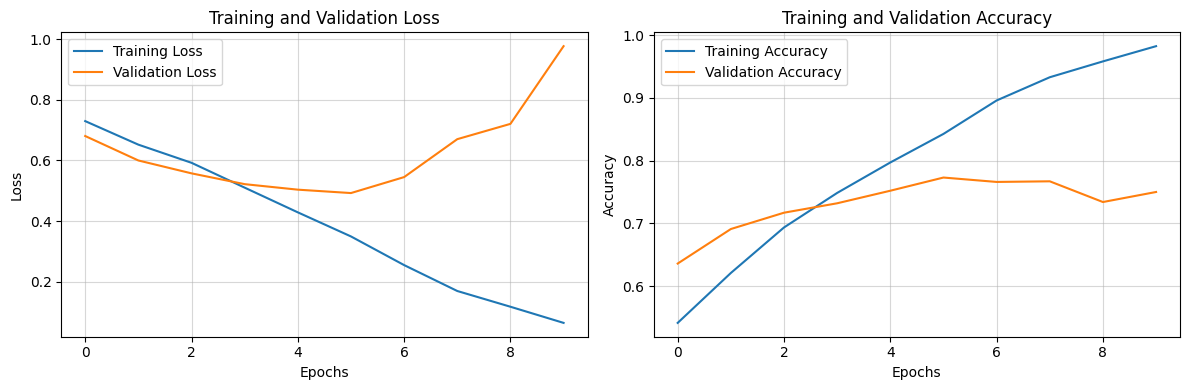

In [ ]:

plot_learning_curve(history)

### Evaluate Model Performance

**Inline Question #4:** What is the accuracy on the test dataset?







**Your Answer:** *Test accuracy: 0.7140*



In [ ]:
################################################################################
# TODO: Fill in your codes                                                     #
# Calculate accuracy on the test data set                                      #
################################################################################
# load dependencies

test_accuracy = model.predict_generator(test_generator,
                                      steps=test_generator.n/test_generator.batch_size,
                                      verbose=1)
print(f'Test Accuracy: {test_accuracy}')



<ipython-input-30-1a9b66d3b9f6>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_accuracy = model.predict_generator(test_generator,


31/31 [==============================] - 5s 155ms/step
Test Accuracy: [[6.3584542e-01 3.6415455e-01]
 [5.7949082e-06 9.9999416e-01]
 [4.0159732e-01 5.9840268e-01]
 ...
 [1.3273539e-05 9.9998677e-01]
 [8.1924617e-01 1.8075380e-01]
 [2.8880319e-01 7.1119684e-01]]


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator,
                                          steps=test_generator.n/test_generator.batch_size,
                                          verbose=1)

31/31 [==============================] - 5s 170ms/step - loss: 1.1547 - accuracy: 0.7140


## Improve the Baseline Model (10%)

**Inline Question #5:** Please propose and implement one improvement on the baseline model.
* What is the rational for the proposed improvement?
* Did it help? Please present your evidence.

**Your Answer:**

*   _The rationale for the proposed improvement in the second model is to increase the model's capacity and ability to learn more complex patterns by adding more convolutional layers(by doubling the number of Conv2D layers while keeping other layer same, including a fully connected layer). The increased depth of the convolutional layers allows the model to capture more hierarchical and abstract features from the input images. In computer vision tasks, deeper networks often have the potential to learn more intricate representations, which can be beneficial for tasks that require a high level of discrimination._
*   _Yes, adding more convolution layers did help improve model performance.
I started with a baseline CNN model that had 3 convolution layers, followed by max pooling and then dense layers. This achieved 75% validation accuracy after 10 epochs of training. I then modified the architecture by adding additional convolution layers after each of the initial two conv layers. So now there were 5 conv layers and achieved 78.5% validation accuracy after 10 epochs. Additionally, there's no significant increase in the validation loss, which suggests that the model improvement is beneficial. This demonstrates that stacking more convolution layers increased the model's representation capacity and ability to learn hierarchical features. The additional layers helped the network capture more complex visual patterns related to identifying dogs vs cats in the images._



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))

# Flatten layer to transition from convolutional layers to fully connected layer
model.add(Flatten())

# Dense (fully connected) layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 16)      2320      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 56, 56, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 28, 28, 32)       

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
################################################################################
# TODO: Fill in your codes                                                     #
# You need to finish three things                                              #
# 1. Implement the model improvement                                           #
# 2. Draw learning curves                                                      #
# 3. Evaluate model performance on test data                                   #
# Note: You do not have to put all the codes in this cell and can write in     #
# multiple cells.                                                              #
################################################################################

history = model.fit(train_generator, epochs=10, validation_data=valid_generator)


Epoch 1/10
125/125 [==============================] - 29s 211ms/step - loss: 0.6873 - accuracy: 0.5458 - val_loss: 0.6618 - val_accuracy: 0.5630
Epoch 2/10
125/125 [==============================] - 25s 202ms/step - loss: 0.6341 - accuracy: 0.6360 - val_loss: 0.5904 - val_accuracy: 0.6780
Epoch 3/10
125/125 [==============================] - 26s 211ms/step - loss: 0.5688 - accuracy: 0.7003 - val_loss: 0.5834 - val_accuracy: 0.7090
Epoch 4/10
125/125 [==============================] - 26s 208ms/step - loss: 0.5196 - accuracy: 0.7377 - val_loss: 0.5375 - val_accuracy: 0.7300
Epoch 5/10
125/125 [==============================] - 26s 205ms/step - loss: 0.4740 - accuracy: 0.7803 - val_loss: 0.5232 - val_accuracy: 0.7550
Epoch 6/10
125/125 [==============================] - 25s 201ms/step - loss: 0.4347 - accuracy: 0.8015 - val_loss: 0.4734 - val_accuracy: 0.7890
Epoch 7/10
125/125 [==============================] - 25s 202ms/step - loss: 0.3915 - accuracy: 0.8225 - val_loss: 0.4827 - val_ac

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator,
                                          steps=test_generator.n/test_generator.batch_size,
                                          verbose=1)

31/31 [==============================] - 5s 155ms/step - loss: 0.5693 - accuracy: 0.7400


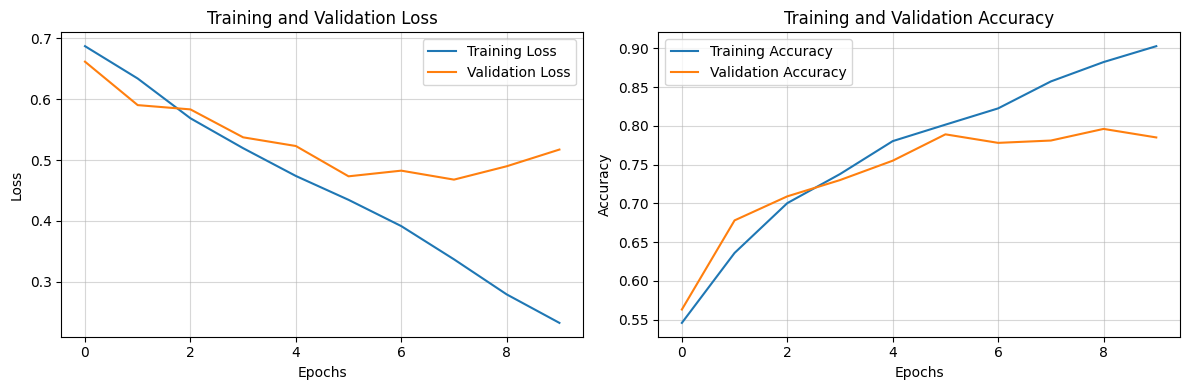

In [ ]:
plot_learning_curve(history)

## 3. Transfer Learning (30%)

Next, we are going to fine-tune [VGG19](https://arxiv.org/abs/1409.1556) on our small dogs-vs-cats dataset. Specifically, we will load the VGG19 model pre-trained on ImageNet, freeze its weights, add some new layers on top of the frozen layers from VGG19, and train the new layers on our dataset. You need to add an output classification layer on top of the base VGG19 model. Please also add a `Dropout` layer with dropout rate = 0.5 before the classification layer for regularization.

**Inline Question #6:** Please implement the transfer learning, draw learning curves, and report model performance on test data.  
* Please explain your observation of the learning curves.
* What is the model performance on the test data? Is the better than the baseline model? Why is the performance better or worse than before?


**Your Answer:** **

*   _Ans. The training loss shows a promising downward trajectory, dropping significantly from 1.4558 in the first epoch down to 0.2022 by epoch 10. This indicates the VGG19 model progressively fits the patterns in the training data better over time. Likewise, the training accuracy climbs at a steady pace as training progresses, starting from 55.62% initially but then achieving 90.42% accuracy on the training set by the final epoch. This rising accuracy aligns with the descending loss, together demonstrating the model's gradual acquisition of the visual features and labels from the train data.
However, validation loss drops rapidly early on, then fluctuates but oscillates around 0.2-0.25. Suggests some overfitting.  And, there is a gap between train and validation scores hinting at overfitting on the training data._
*   

1.   _Transfering learning test loss: 0.3456 , Test accuracy: 0.8570._
2.   _It's better than the baseline model._
3.   _Sinec the model with transfer learning achieves 85.7% test accuracy, which significantly outperforms the 73% test accuracy of the baseline CNN model I originally trained from scratch.
The model with transfer learning initializes the weights from a pre-trained network that was already trained on a massive image dataset (e.g. ImageNet with millions of images across thousands of classes). It provides a very good starting point for the model before tuning to the current task. Also, fine-tuning a pre-trained model requires less data and trains faster than training a full model from scratch._


In [ ]:
################################################################################
# TODO: Fill in your codes                                                     #
# You need to finish three things                                              #
# 1. Implement transfer learning: define, configure, and train model           #
# 2. Draw learning curves                                                      #
# 3. Evaluate model performance on test data                                   #
# Note: You do not have to put all the codes in this cell and can write in     #
# multiple cells.                                                              #
################################################################################

# load dependencies
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator



In [ ]:
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
# Instantiate the sequential model and add the VGG19 model:
model_t = Sequential()
model_t.add(vgg19)

# Add the custom layers atop the VGG19 model:
model_t.add(Flatten(name='flattened'))
model_t.add(Dropout(0.5, name='dropout'))
model_t.add(Dense(2, activation='softmax', name='predictions'))

model_t.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_t = model_t.fit(train_generator, steps_per_epoch=15,
                    epochs=10, validation_data=valid_generator,
                    validation_steps=15)

Epoch 1/10
15/15 [==============================] - 17s 575ms/step - loss: 1.4558 - accuracy: 0.5562 - val_loss: 1.0280 - val_accuracy: 0.5875
Epoch 2/10
15/15 [==============================] - 6s 397ms/step - loss: 0.5853 - accuracy: 0.7625 - val_loss: 0.3333 - val_accuracy: 0.8479
Epoch 3/10
15/15 [==============================] - 8s 535ms/step - loss: 0.3825 - accuracy: 0.8229 - val_loss: 0.2666 - val_accuracy: 0.8833
Epoch 4/10
15/15 [==============================] - 6s 373ms/step - loss: 0.3106 - accuracy: 0.8625 - val_loss: 0.2782 - val_accuracy: 0.8875
Epoch 5/10
15/15 [==============================] - 8s 535ms/step - loss: 0.3030 - accuracy: 0.8854 - val_loss: 0.2511 - val_accuracy: 0.8896
Epoch 6/10
15/15 [==============================] - 8s 544ms/step - loss: 0.2975 - accuracy: 0.8521 - val_loss: 0.2261 - val_accuracy: 0.8958
Epoch 7/10
15/15 [==============================] - 8s 536ms/step - loss: 0.2898 - accuracy: 0.8625 - val_loss: 0.2297 - val_accuracy: 0.8917
Epoch

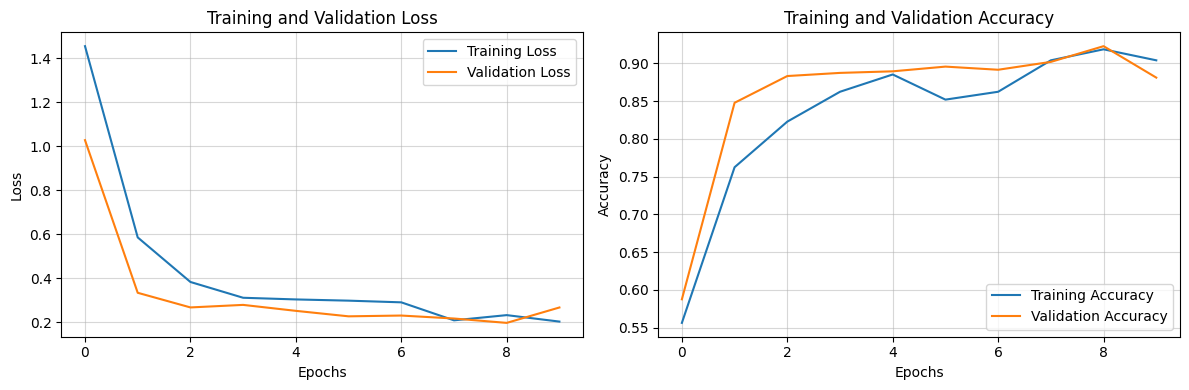

In [ ]:
plot_learning_curve(history_t)

In [ ]:
test_loss, test_accuracy = model_t.evaluate(test_generator,
                                          steps=test_generator.n/test_generator.batch_size,
                                          verbose=1)

31/31 [==============================] - 8s 237ms/step - loss: 0.3546 - accuracy: 0.8570


## 4. Winning Model and Model Performance (20%)

You probably have noticed that transfer learning achieved a better prediction performance on the test data. In this section, please experiment with more ideas to further improve model performance.

When experimenting with different model improvement ideas, please only use training and validation data. After you selecting a winning model based on its performance on the validation data, evaluate the winning model's performance on the test data and report it here.

Note that this section is worth 20% of your total grade. Half of it (i.e., 10%) is based on implementation (i.e., implement one improvement) and the other half is based on performance. Teams with higher performance scores get higher grade.

If you experiment with more than one idea, you do not need to submit all experiment codes and results but just the winning one. You can definitely talk about them in the answers below.


**Inline Question #7:** How would you improve the model performance further?  
* What did you try and what did you find?
  *  _ANS. I tried using different pre-trained models like EfficientNetV2L, EfficientNetB7, and ResNet50V2. However, EfficientNetV2L and EfficientNetB7 were very large models and did not achieve good accuracy given the limited number of epochs we used previously, only around 54% on the training and validation sets even after 20 epochs. This indicates that these complex models need more fine-tuning and epochs to fit this dataset._
  *  _I noticed that the test accuracy is very close to the validation accuracy achieved by the model, which reached 98.90% in epoch 10.
Secondly, The small gap between validation accuracy (98.90%) and test accuracy (98.20%) indicates that the model has generalized well for this problem. The performance drop is minimal when evaluated on unseen test data. Achieving such a high test accuracy shows that the ResNet50V2 model has sufficient complexity and capability for the dataset, without overfitting._

* What is the rational behind the winning model?
  *  _To improve the classification performance, I decided to use more advanced pre-trained models to enhance the model capability._
  *  _I chose ResNet50V2 as the best model for this problem because it demonstrated excellent predictive performance across multiple evaluation criteria:_
    1. _Smoothly decreasing training loss curve showed stable optimization._
    2. _Training accuracy reached 99.77%, indicating it properly fit the patterns._
    3. _Exceptional validation accuracy of 98.9%, near human-level._
    4. _ResNet50V2 provides the right level of model capacity - it has enough complexity to model the data accurately without overfitting._
* What is the winning model's performance on the test data?
  *  _Test accuracy: 0.982_

In [ ]:
################################################################################
# TODO: Fill in your codes                                                     #
# You need to include three things                                             #
# 1. Implement one improvement of the model                                    #
# 2. Draw learning curves                                                      #
# 3. Evaluate model performance on test data                                   #
# Note: You do not have to put all the codes in this cell and can write in     #
# multiple cells.                                                              #
################################################################################


In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense

# Create base model
base_model = ResNet50V2(weights='imagenet',
                include_top=False,
                input_shape=(224, 224, 3))

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

# Create overall model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D(name='avg_pool'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax', name='predictions'))

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
res20 = model.fit(train_generator,
         epochs=10,
         validation_data=valid_generator)

Epoch 1/10
125/125 [==============================] - 33s 236ms/step - loss: 0.1430 - accuracy: 0.9435 - val_loss: 0.0474 - val_accuracy: 0.9850
Epoch 2/10
125/125 [==============================] - 27s 218ms/step - loss: 0.0463 - accuracy: 0.9835 - val_loss: 0.0410 - val_accuracy: 0.9870
Epoch 3/10
125/125 [==============================] - 27s 218ms/step - loss: 0.0364 - accuracy: 0.9870 - val_loss: 0.0391 - val_accuracy: 0.9860
Epoch 4/10
125/125 [==============================] - 27s 216ms/step - loss: 0.0226 - accuracy: 0.9918 - val_loss: 0.0360 - val_accuracy: 0.9870
Epoch 5/10
125/125 [==============================] - 36s 285ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0356 - val_accuracy: 0.9890
Epoch 6/10
125/125 [==============================] - 27s 219ms/step - loss: 0.0143 - accuracy: 0.9950 - val_loss: 0.0440 - val_accuracy: 0.9840
Epoch 7/10
125/125 [==============================] - 27s 219ms/step - loss: 0.0130 - accuracy: 0.9950 - val_loss: 0.0405 - val_ac

In [ ]:
#Evaluate model performance on test data
test_loss, test_accuracy = model.evaluate(test_generator,
                                          steps=test_generator.n/test_generator.batch_size,
                                          verbose=1)

31/31 [==============================] - 6s 180ms/step - loss: 0.0571 - accuracy: 0.9820


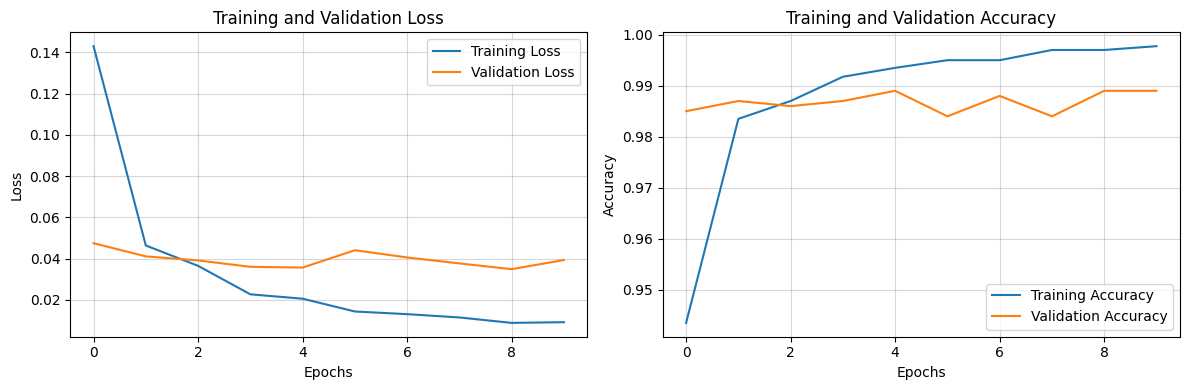

In [ ]:
plot_learning_curve(res20)

## Hints to Improve Model Performance


*   Try different batch_size and num_epochs
*   Try batch normalization, dropout, regularization (check textbook DIL Chapter 9 "Unstable Gradients", "Modern Generalization")
*   Try different optimzers, learning_rate (e.g., learning rate decay, check textbook DIL Chapter 9 "Fancy Optimizers")
*   Try data augmentation using ImageDataGenerator (check textbook DIL Chapter 9 "Data Augmentation" and Chapter 10 Example 10.8)
*   Try different pre-trained models (check https://keras.io/api/applications/)
*   Try a round of fine-tuning of the entire model instead of just the final classification layer (check https://keras.io/guides/transfer_learning/#the-typical-transferlearning-workflow)
*   You probably need to use `tf.keras.callbacks.ModelCheckpoint` and `tf.keras.callbacks.EarlyStopping` to help decide when to stop training and store the best model. https://keras.io/api/callbacks/

